(sec-law-large-numbers)=
# Introduzione all'inferenza frequentista

La statistica frequentista e la statistica bayesiana sono due approcci principali per l'inferenza statistica, il processo di utilizzare i dati per fare conclusioni su una popolazione. Entrambi gli approcci sono utilizzati per stimare quantità sconosciute, fare previsioni e testare ipotesi, ma differiscono nella loro interpretazione della probabilità e in come incorporano le conoscenze precedenti ed evidenze.

Nella statistica frequentista, la probabilità viene interpretata come la frequenza relativa a lungo termine di un evento in un numero infinito di prove. Questo approccio si basa sull'idea che il vero valore di un parametro della popolazione sia fisso, ma sconosciuto e debba essere stimato dai dati. In questo contesto, le inferenze statistiche vengono ottenute a partire dai dati osservati, mediante l'utilizzo di tecniche come la stima puntuale, gli intervalli di confidenza e il test di ipotesi, e facendo alcune assunzioni riguardo al processo sottostante che genera i dati.

D'altra parte, la statistica bayesiana interpreta la probabilità come una misura di convinzione o grado di certezza riguardo a un evento. Questo approccio consente di incorporare conoscenze pregresse ed evidenze nell'analisi statistica attraverso l'uso del teorema di Bayes. In questo contesto, il vero valore di un parametro della popolazione è trattato come una variabile casuale e viene continuamente aggiornato man mano che vengono raccolti nuovi dati. Ciò porta alla formazione di una distribuzione completa nello spazio dei parametri, nota come distribuzione a posteriori, che può essere utilizzata per fare previsioni probabilistiche e quantificare l'incertezza associata.

Una differenza fondamentale tra i due approcci statistici riguarda la gestione dell'incertezza. Nella statistica frequentista, l'incertezza viene quantificata mediante l'utilizzo degli intervalli di confidenza, che forniscono una stima dell'intervallo che contiene il vero valore del parametro della popolazione in base ai dati osservati, assegnando una probabilità ai risultati della procedura che porta al calcolo dell'intervallo di confidenza. Nella statistica bayesiana, invece, l'incertezza è rappresentata dalla distribuzione a posteriori completa, che permette una caratterizzazione più completa dell'incertezza che circonda il vero valore del parametro.

Un'altra importante distinzione tra i due approcci statistici riguarda la capacità della statistica bayesiana di incorporare conoscenze pregresse, il che può essere particolarmente utile quando i dati sono scarsi o quando il processo che genera i dati è complesso. Tuttavia, è importante notare che la scelta della distribuzione a priori può avere un forte impatto sui risultati dell'analisi bayesiana, pertanto è necessario selezionare una distribuzione a priori adeguata per il problema in questione.

In questo capitolo, forniremo una panoramica dei concetti fondamentali dell'inferenza statistica frequentista.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import math
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
sns.set_theme(
    context="paper",
    palette="colorblind"
)
az.style.use("arviz-darkgrid")

## Parametri e statistiche

In statistica, il termine *popolazione* si riferisce a un insieme di elementi che presentano caratteristiche aleatorie. Al contrario, il *campione* rappresenta un sottoinsieme di tale popolazione. Ad esempio, per uno psicologo, la popolazione potrebbe essere costituita da un gruppo di individui, mentre per un biologo marino, la popolazione potrebbe essere composta da un insieme di delfini. Tuttavia, dal punto di vista statistico, le popolazioni sono considerate entità astratte, e gli esperti le rappresentano attraverso oggetti matematici, come ad esempio le distribuzioni di probabilità.

Consideriamo, ad esempio, il quoziente di intelligenza (QI). Uno psicologo potrebbe considerare la popolazione come un gruppo di individui, ognuno con un determinato punteggio del QI. Tuttavia, dal punto di vista statistico, gli esperti semplificano questa situazione definendo la popolazione come una distribuzione di densità che rappresenta la "forma" dell'istogramma che si otterrebbe se si osservasse un gran numero di individui. Questo oggetto matematico consente agli statistici di manipolare facilmente la popolazione e di eseguire calcoli su di essa.

Per fare un esempio concreto, consideriamo la distribuzione del QI. I test di intelligenza sono stati progettati in modo che la media del QI sia 100, la deviazione standard dei punteggi QI sia 15 e la distribuzione dei punteggi del QI sia normale. Questi valori rappresentano i *parametri*, poiché descrivono le proprietà dell'intera popolazione. Possiamo quindi rappresentare questa ipotetica popolazione di valori del QI attraverso un oggetto matematico che corrisponde a una distribuzione normale:

$$
QI \sim \mathcal{N}(\mu = 100, \sigma = 15).
$$

Supponiamo ora di eseguire un esperimento in cui il test di intelligenza viene somministrato a 20 persone selezionate a caso. Questo campione casuale semplice consiste in un insieme di 20 numeri. Per esempio il seguente:

In [4]:
size = 20
x = np.random.normal(loc=100, scale=15, size=size).round()
print(*x)

101.0 110.0 95.0 99.0 101.0 86.0 111.0 107.0 113.0 95.0 77.0 136.0 118.0 108.0 115.0 122.0 91.0 77.0 110.0 76.0


Se costruiamo un istogramma con i dati di questo campione, notiamo che approssimativamente assume la forma di una distribuzione Normale, anche se è un'approssimazione grezza della distribuzione della popolazione descritta dalla funzione di densità $\mathcal{N}(100, 15)$. Calcolando la media del campione, otteniamo un valore che è abbastanza vicino alla media della popolazione di 100, ma non identico. Nel campione in questione, la media e la deviazione standard sono pari a:

In [5]:
xbar = np.mean(x)
print(xbar)

102.4


In [6]:
x_std = np.std(x)
print(x_std)

15.46091847207015


Queste *statistiche campionarie* sono delle proprietà che descrivono lo specifico campione che abbiamo osservato e, pur essendo abbastanza simili ai parametri della popolazione, non sono uguali a questi ultimi. In altre parole, le statistiche campionarie rappresentano ciò che possiamo calcolare a partire dai dati osservati sul campione, mentre i parametri della popolazione rappresentano ciò che vorremmo conoscere.

## Teorema di Bernoulli

I risultati ottenuti finora sembrano promettenti, poiché la media campionaria si avvicina alla media della popolazione $\mu = 100$ in modo ragionevole. Tuttavia, in alcuni studi, un livello di precisione così basso potrebbe non essere sufficiente e sarebbe necessario ottenere stime più precise dei parametri della popolazione.

La soluzione per ottenere statistiche campionarie più vicine ai parametri della popolazione è semplice: raccogliere più dati. Ad esempio, se conduciamo un nuovo esperimento in cui misuriamo il QI di 10000 persone, possiamo ottenere stime più precise per la media e la deviazione standard della popolazione, poiché il campione sarà più rappresentativo della popolazione.

In [8]:
size = 10000
x = np.random.normal(loc=100, scale=15, size=size)

In [9]:
xbar = np.mean(x)
print(xbar)

100.08488681419135


In [10]:
x_std = np.std(x)
print(x_std)

14.911302667786543


È chiaro che, nel secondo caso in cui abbiamo raccolto dati da un campione più ampio di 10000 persone, l'approssimazione dei valori della media e della deviazione standard del campione alla media e alla deviazione standard della popolazione è molto più precisa. Questo è dovuto alla *Legge dei grandi numeri*, la quale afferma che la media di un grande numero di osservazioni di una variabile aleatoria indipendente e identicamente distribuita tende a convergere al valore atteso teorico.

Tuttavia, è importante sottolineare che la Legge dei grandi numeri non garantisce che i dati raccolti siano utili o che la media sia una buona sintesi dei dati. Ad esempio, se lo strumento di misurazione è difettoso, la media di molte misurazioni potrebbe essere una stima molto precisa del valore sbagliato a causa di un errore sistematico o di campionamento diverso dal fenomeno di fluttuazione casuale descritto dalla Legge dei grandi numeri.

## Distribuzione delle medie campionarie

Abbandoniamo l'idea di ottenere un campione di 10,000 persone, perché non è pratico. Chiediamoci invece quale relazione ci sia tra le statistiche del campione e i parametri della popolazione, nel caso di campioni di piccole dimensioni. Per esempio, consideriamo un campione di ampiezza 5.

In [11]:
IQ_1 = np.random.normal(loc=100,scale=15,size=5).astype(int)
print("Dati simulati: ", IQ_1)
print("Media dei dati simulati: ", np.mean(IQ_1))


Dati simulati:  [ 88 103 114  86  83]
Media dei dati simulati:  94.8


In un secondo campione verranno ottenuti valori diversi. Ripetiamo la simulazione 5 volte, considerando ogni volta un campione casuale diverso di 5 osservazioni.

In [12]:
df = pd.DataFrame(
    {'IQ1': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ2': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ3': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ4': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ5': np.random.normal(loc=100,scale=15,size=5).astype(int)
    }) 

df.describe()

,IQ1,IQ2,IQ3,IQ4,IQ5
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,90.600000,100.400000,94.600000,103.800000,110.200000
std,24.785076,14.258331,15.852445,12.316655,31.043518
min,63.000000,82.000000,84.000000,89.000000,69.000000
25%,77.000000,91.000000,85.000000,92.000000,101.000000
50%,81.000000,102.000000,85.000000,110.000000,108.000000
75%,108.000000,109.000000,98.000000,113.000000,118.000000
max,124.000000,118.000000,121.000000,115.000000,155.000000


Continuiamo così per 10,000 repliche e poi disegniamo un istogramma. Facendo così otteniamo un'approssimazione di quella che, in statistica, viene chiamata la *distribuzione delle medie campionarie*. La figura seguente mostra l'istogramma dei valori delle medie dei 10,000 campioni casuali di ampiezza 5 estratti dalla popolazione dei QI, insieme alla funzione di densità che rappresenta la popolazione del QI.

<Axes: >

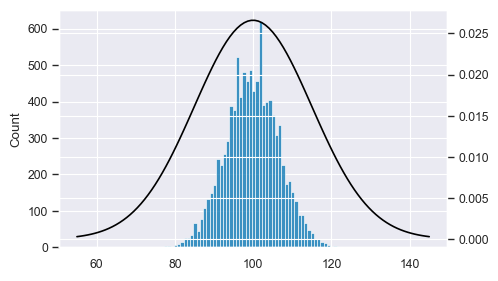

In [13]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and calculate the sample 
# mean for each experiment
sample_means = []
for i in range(1,10000):
    sample_mean = np.mean(np.random.normal(loc=100,scale=15,size=5).astype(int))
    sample_means.append(sample_mean)

# plot a histogram of the distribution of sample means, together with the 
# population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x,y=y, ax=ax2, color='black')

Si notino due aspetti importanti:

- la media della distribuzione delle medie campionarie è uguale alla media della popolazione,
- la varianza della distribuzione delle medie campionarie è minore della varianza della popolazione.

Questi due risultati che abbiamo ottenuto empiricamente possono essere espressi in maniera formale nel modo seguente.

La media di campioni casuali estratti con ripetizione da una popolazione finita (oppure da una popolazione infinita) di media $\mu$ e varianza $\sigma^2$  si può esprimere come $\bar{X}_n = S_n/n$, dove $S_n = X_1 + X_2 + \dots + X_n$ è la somma di $n$ v.c. indipendenti che hanno la medesima densità di probabilità. In tali circostanze, la variabile casuale "media campionaria" avrà valore atteso

$$
\mathbb{E}(\bar{X}_n) = \frac{1}{n} \mathbb{E}(S_n) = \frac{1}{n} n \mu = \mu.
$$

e varianza

$$
\mathbb{V}(\bar{X}_n) = \frac{1}{n^2} \mathbb{V}(S_n) = \frac{1}{n^2} n \sigma^2 
= \frac{\sigma^2}{n}.
$$

Si noti che la derivazione della varianza (ma non del valore atteso) richiede che venga soddisfatta la condizione dell'indipendenza; in altre parole, questi risultati valgono solo per campioni casuali indipendenti.

## Distribuzioni campionarie di altre statistiche

Ovviamente è possibile costruire la distribuzione campionaria di altre statistiche campionarie.  Ad esempio, la figura seguente mostra l'approssimazione empirica della distribuzione campionaria del valore massimo del campione. È chiaro che, se da ciascun campione estraiamo il valore massimo, il valore atteso della distribuzione campionaria di questa statistica sarà maggiore della media della popolazione.

<Axes: >

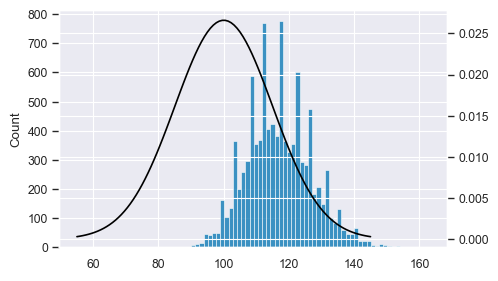

In [14]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find the maximum score for each experiment
sample_maxes = []
for i in range(1, 10000):
    sample_max = max(np.random.normal(loc=100, scale=15, size=5).astype(int))
    sample_maxes.append(sample_max)

# plot a histogram of the distribution of sample maximums, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_maxes, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x, y=y, ax=ax2, color="black")


La distribuzione campionaria della varianza dei campioni è particolarmente interessante. Usiamo la formula della statistica descrittiva, ovvero

$$
S^2 = \frac{\sum_{i=1}^n (Y_i - \bar{Y})^2}{n}.
$$

Una volta compresa la procedura, possiamo creare un grafico che rappresenta l'approssimazione empirica della distribuzione campionaria della varianza dei punteggi del quoziente di intelligenza. Sapendo che la varianza della popolazione è uguale a $15^2$, abbiamo utilizzato la simulazione per stimare la varianza della popolazione. Tuttavia, il risultato ottenuto è stato interessante: in media, l'utilizzo della formula precedente ha portato a una stima della varianza della popolazione troppo piccola. Gli statistici chiamano questa discrepanza *distorsione*, ovvero quando il valore atteso di uno stimatore non coincide con il parametro.

180.04637931267774

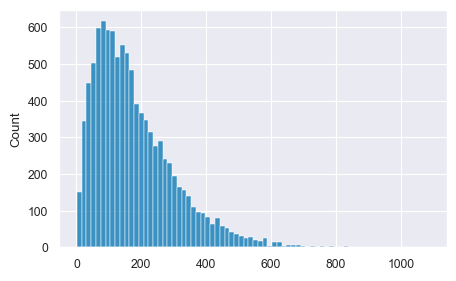

In [15]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5))
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

Abbiamo già visto come questo problema trova una semplice soluzione nel momento in cui usiamo $n-1$ al denominatore.

226.57694474740248

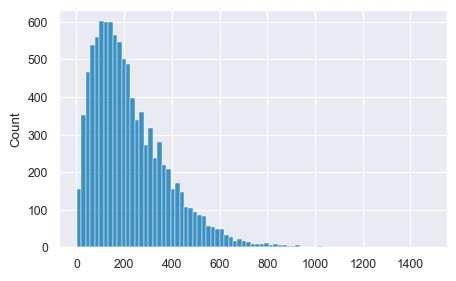

In [16]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5), ddof=1)
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

## Teorema del limite centrale

Nel 1812, Laplace dimostrò il teorema del limite centrale (TLC), che afferma che la somma di una sequenza di variabili casuali indipendenti tende a distribuirsi come una distribuzione Normale. Inoltre, il TLC stabilisce i parametri della distribuzione Normale risultante in base ai valori attesi e alle varianze delle variabili casuali che vengono sommate.

```{admonition} Teorema
Si supponga che $Y = Y_1, \dots, Y_i, \ldots, Y_n$ sia una sequenza di v.a. i.i.d. con $\mathbb{E}(Y_i) = \mu$ e $SD(Y_i) = \sigma$. Si definisca una nuova v.c. come:

$$
Z = \frac{1}{n} \sum_{i=1}^n Y_i.
$$

Con $n \rightarrow \infty$, $Z$ tenderà ad una Normale con lo stesso valore atteso di $Y_i$ e una deviazione standard che sarà più piccola della deviazione standard originaria di un fattore pari a $\frac{1}{\sqrt{n}}$:

$$
p_Z(z) \rightarrow \mathcal{N}\left(z \ \Bigg| \ \mu, \, \frac{1}{\sqrt{n}} \cdot \sigma \right).
$$
```

Il TLC può essere generalizzato a variabili casuali che non hanno la stessa distribuzione, a condizione che siano indipendenti e abbiano aspettative e varianze finite. Molti fenomeni naturali, come l'altezza dell'uomo adulto di entrambi i generi, sono il risultato di una combinazione di effetti additivi relativamente piccoli. Questi effetti, indipendentemente dalla loro distribuzione, tendono a portare alla normalità della distribuzione risultante. Questa è la ragione per cui la distribuzione normale fornisce una buona approssimazione per la distribuzione di molti fenomeni naturali.

Per illustrare il TLC, possiamo utilizzare una simulazione. Ad esempio, consideriamo una popolazione iniziale fortemente asimmetrica, come una distribuzione Beta(2, 1). Estraiamo da questa popolazione 50.000 campioni di ampiezza $n$ e costruiamo la distribuzione campionaria di tali campioni.

In [17]:
# parameters of the beta
a=2
b=1

def plotSamples(n):
    # create normal distribution with mean and standard deviation of the beta
    mu = a / (a+b)
    sigma = math.sqrt( a*b / (a+b)**2 / (a+b+1) )
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma/math.sqrt(n))

    # find sample means from samples of "ramped" beta distribution
    values = []
    for i in range(n):
        v = []
        for j in range(50000):
          v.append(np.random.beta(a,b))
        values.append(v)
    df = pd.DataFrame(values)
    sample_means = df.mean(axis=0)

    # plot a histogram of the distribution of sample means, together 
    # with the population distribution
    fig, ax = plt.subplots(sharex=True)
    sns.histplot(sample_means)
    ax2 = ax.twinx()
    sns.lineplot(x=x,y=y, ax=ax2, color='black')
    ax.set(yticklabels=[])
    ax2.set(yticklabels=[])
    ax.set(ylabel=None)
    ax2.set(ylabel=None)
    ax.tick_params(left=False)
    ax2.tick_params(right=False)
    ax.set_title("Ampiezza campionaria = " + str(n))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)


Se l'ampiezza campionaria è 1, allora la ditribuzione campionaria delle medie coincide con la popolazione.

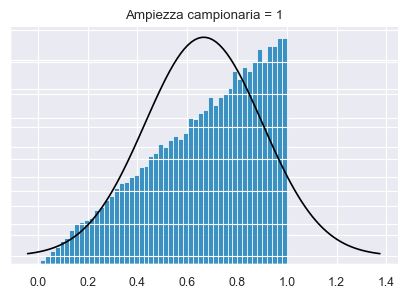

In [18]:
plotSamples(1)

Con $n$ = 2, la distribuzione delle medie dei campioni non è certamente Normale, inizia ad avvicinarsi alla gaussianità.

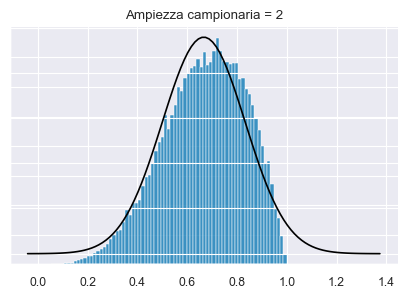

In [19]:
plotSamples(2)

Con $n$ = 4 c'è ancora una grande differenza tra la distribuzione campionaria delle medie dei campioni e la distribuzione normale, ma l'approssimazione migliora.

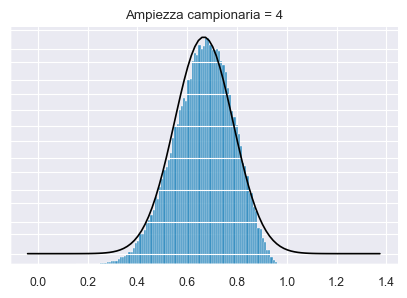

In [20]:
plotSamples(4)

Con $n$ = 4 direi che una funzione $\mathcal{N}(100, 15/\sqrt{50})$ fornisce una buona approssimazione alla distribuzione campionaria delle medie dei campioni.

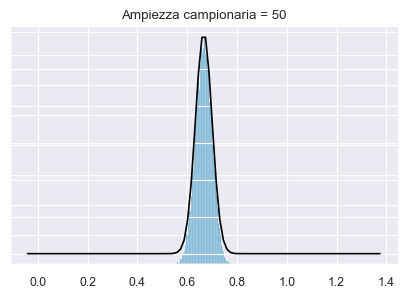

In [21]:
plotSamples(50)

Il teorema del limite centrale (TLC) afferma che, salvo per campioni molto piccoli, la distribuzione campionaria della media dei campioni può essere ben approssimata dalla Normale, indipendentemente dalla forma della distribuzione della popolazione. Ciò significa che, per campioni sufficientemente grandi, il TLC ci fornisce una formula esplicita per la forma della distribuzione campionaria della media dei campioni, anche in assenza di conoscenze sulla popolazione di media $\mu$ e deviazione standard $\sigma$: $\bar{X} \sim \mathcal{N}(\mu, \sigma/\sqrt{n})$.

Il risultato del TLC ha una grande utilità in molti ambiti. Infatti, ci aiuta a comprendere perché i risultati degli esperimenti con un grande numero di osservazioni sono più affidabili rispetto a quelli con un numero ridotto di osservazioni. Inoltre, il TLC ci fornisce una formula esplicita per l'errore standard ($\sigma/\sqrt{n}$), che ci consente di valutare l'affidabilità degli esperimenti al variare della dimensione del campione. 

Negli esperimenti psicologici, molti dei fenomeni che vogliamo misurare sono in realtà medie di molteplici variabili (ad esempio, l'intelligenza "generale" misurata dal QI è una media di un gran numero di abilità specifiche), e in questi casi la quantità media segue una distribuzione normale. Questa legge matematica ci permette di osservare spesso la distribuzione normale nei dati degli esperimenti psicologici e in molte altre discipline scientifiche.

## Considerazioni conclusive

In generale, i parametri della popolazione sono sconosciuti, ma possiamo stimarli utilizzando le informazioni del campione. Di seguito viene presentata una tabella che riassume i simboli comuni utilizzati per indicare le quantità note e sconosciute nel contesto dell'inferenza statistica. Questo ci aiuterà a tenere traccia di ciò che sappiamo e ciò che non sappiamo.

|Simbolo          | Nome           | È qualcosa che conosciamo?     |
|:----------------|:-------------|:--------------------|
|$s$              |Deviazione standard del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma$         |Deviazione standard della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}$  | Stima della deviazione standard della popolazione | Sì, ma non è uguale a $\sigma$ |
|$s^2$            | Varianza del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma^2$       | Varianza della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}^2$ | Stima della varianza della popolazione  | Sì, ma non è uguale a $\sigma^2$  |

Utilizzando le informazioni di un campione casuale di ampiezza $n$

-  la stima migliore che possiamo ottenere della media $\mu$ della popolazione è data dalla media $\bar{Y}$ del campione;
-  la stima migliore che possiamo ottenere della varianza $\sigma^2$ della popolazione è data da

$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2.
$$

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w